In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.util import invert
from scipy.spatial import distance
import os
import PIL
from PIL import Image, ImageDraw
import math
from IPython.display import clear_output
from scipy import stats
from scipy.spatial import ConvexHull, convex_hull_plot_2d

import sys
sys.path.append('modules')
from modules import math
from modules import drawmath
from modules import findcorners

# Prev

In [2]:
def convex_cv_v(img_cv):
    img_cv = invert(img_cv)
    gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
    for i in range(gray.shape[0]):
        for j in range(gray.shape[1]):
            if(gray[i,j]>50):
                gray[i,j]=255

    # Find the contours in the image 
    ret, thresh = cv2.threshold(gray, 50, 255,0)
    contours, hierarchy = cv2.findContours(thresh, 2, 1) 
    cnt = contours[0]
    hull = cv2.convexHull(cnt,returnPoints=False,clockwise=False)

    defects = cv2.convexityDefects(cnt,hull)
    
    return hull,contours,gray,defects

In [3]:
def get_outline(path):
    img = cv2.imread(path)

    img = PIL.Image.fromarray(img)
    img = img.resize((500,500), resample=Image.BOX)
    #img = img.rotate(45,expand=1,fillcolor='white')
    plt.imshow(img)
    img = np.array(img)
    
    _, contour, _, _ = convex_cv_v(img)
    cnt = contour[0]
    return np.reshape(cnt, (cnt.shape[0], 2))

# Start

In [4]:
def center_outline(outline, center):
    cx, cy = center
    X = outline[:,0]
    Y = outline[:,1]
    minx = np.min(X)
    maxx = np.max(X)
    miny = np.min(Y)
    maxy = np.max(Y)
    medx = (maxx - minx)//2 + minx
    medy = (maxy - miny)//2 + miny
    print(medx, medy)
    deltax = cx-medx
    deltay = cy-medy
    print(deltax, deltay)
    outline[:,0] = outline[:,0] + deltax
    outline[:,1] = outline[:,1] + deltay

/var/folders/dv/thw7jrq56hxcn_nzxt880tyh0000gn/T/ipykernel_7683/3975226718.py:5: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  img = img.resize((500,500), resample=Image.BOX)


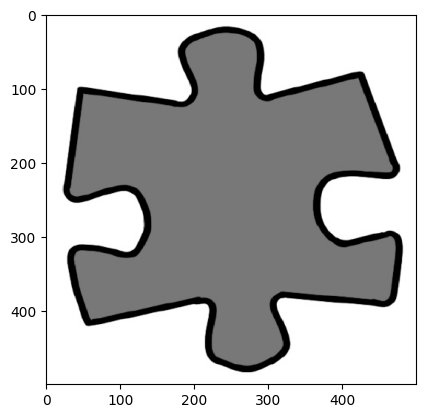

In [5]:
cnt = get_outline('b_14.jpg')

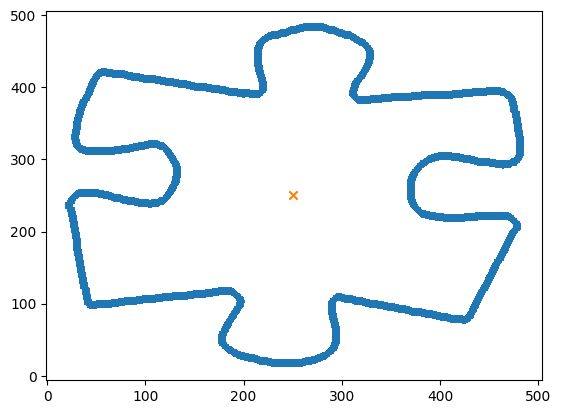

In [6]:
X = cnt[:,0]
Y = cnt[:,1]
plt.scatter(X, Y, marker='+')
plt.scatter(250, 250, marker='x')

251 250
-1 0


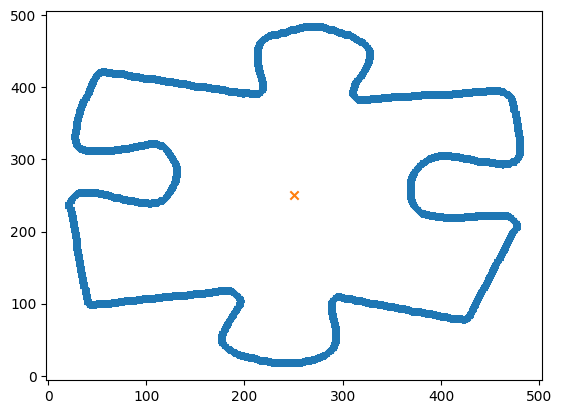

In [7]:
center_outline(cnt, (250, 250))
X = cnt[:,0]
Y = cnt[:,1]
plt.scatter(X, Y, marker='+')
plt.scatter(250, 250, marker='x')

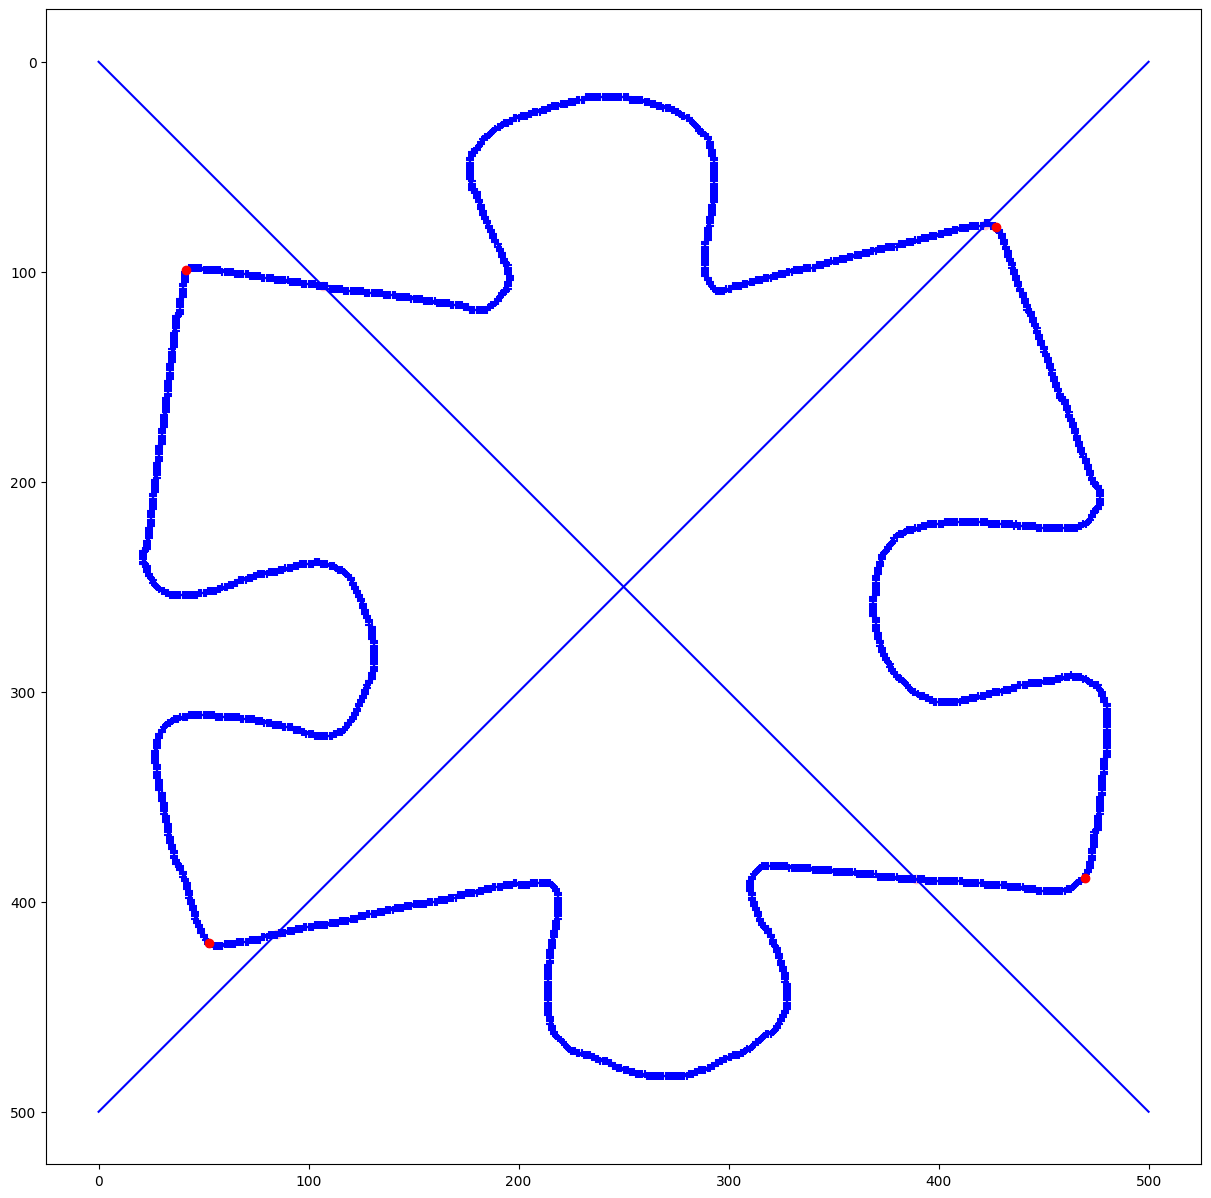

In [8]:
# Start cross
linea = 1, 0
lineb = -1, 500

#cnt = get_outline('bb.png')
cornera, cornerb, cornerc, cornerd = findcorners.find_4_corners_and_show(linea, lineb, cnt, to_draw=(True, None))

/var/folders/dv/thw7jrq56hxcn_nzxt880tyh0000gn/T/ipykernel_7683/3975226718.py:5: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  img = img.resize((500,500), resample=Image.BOX)


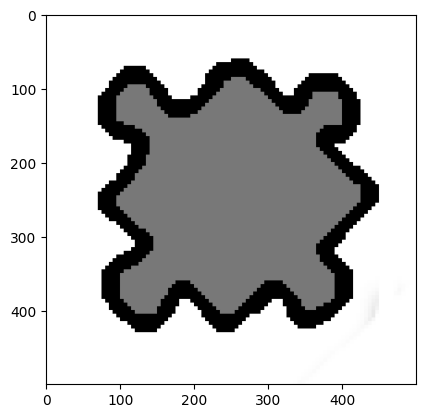

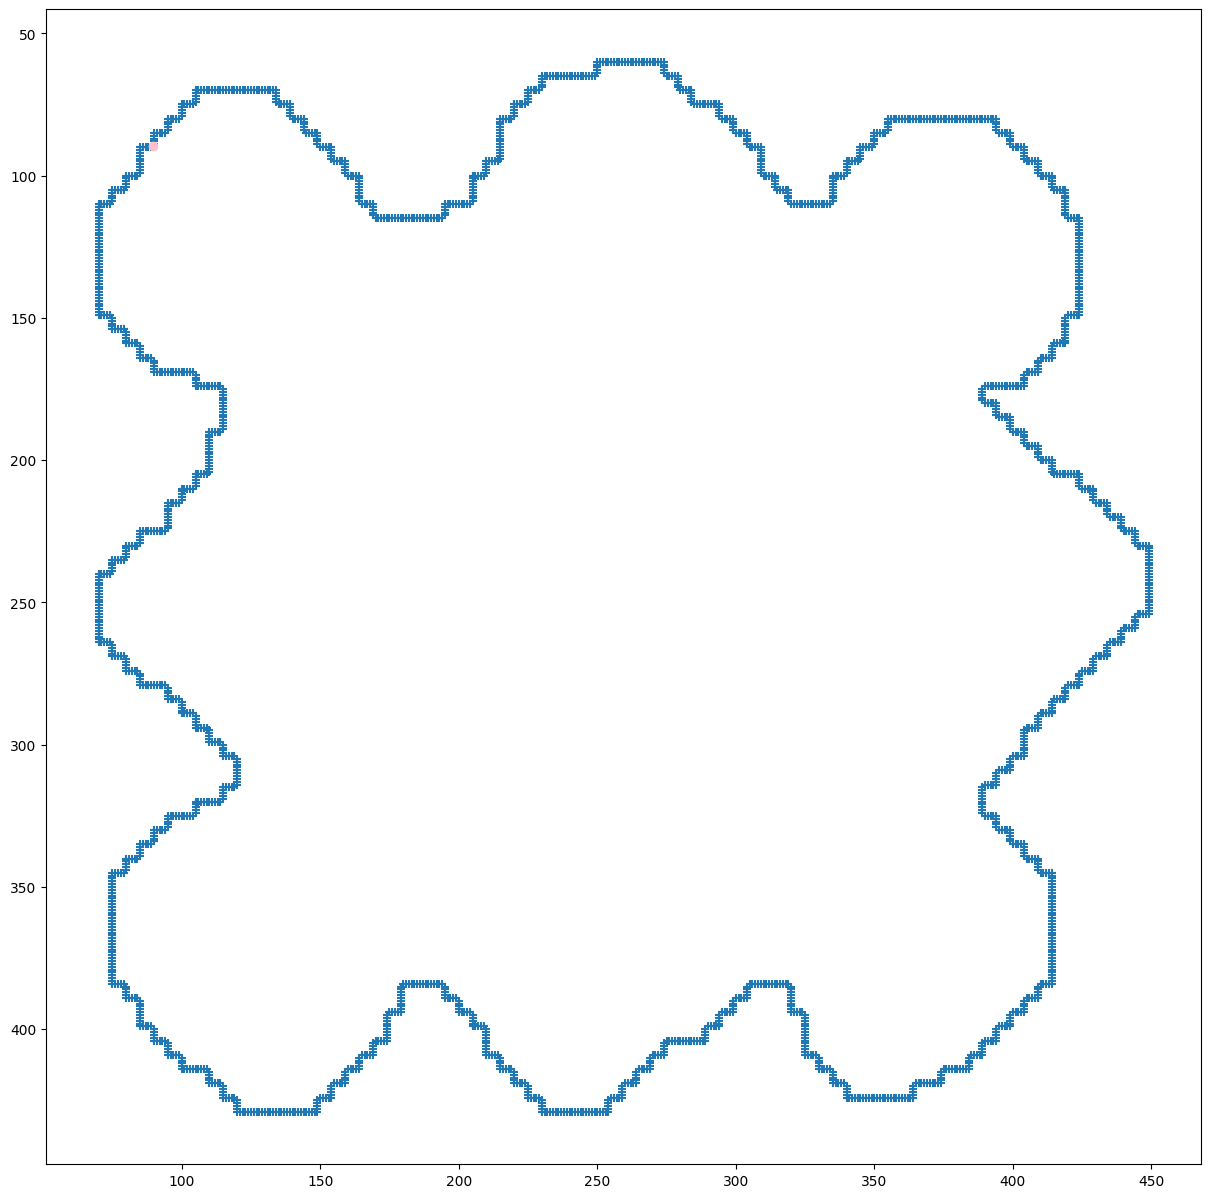

In [ ]:
# Start cross
linea = 1, 0
lineb = -1, 500

cnt = get_outline('bb.png')
cornera, cornerb, cornerc, cornerd = findcorners.find_4_corners_and_show(linea, lineb, cnt, to_draw=(True, None))

In [ ]:
print(cornera, cornerb, cornerc, cornerd)